# XLE VXXLE

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [10]:
from statsmodels.tsa.arima_model import ARMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_projects\stock_vol_ts_model\Data\CBOE_DLY_VXXLE, 1D.csv',parse_dates=True,index_col='time')

In [4]:
df.head()

,open,high,low,close,"XLE, CBOE ONE: Open","XLE, CBOE ONE: High","XLE, CBOE ONE: Low","XLE, CBOE ONE: Close",MA,Smoothing Line,Volume,Volume MA,Basic EPS,EPS estimates,Average basic shares outstanding,Diluted shares outstanding
time,,,,,,,,,,,,,,,,
2011-03-16 13:30:00+00:00,28.99,33.52,28.65,32.16,75.17000,75.81000,72.98000,73.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-17 13:30:00+00:00,28.99,33.52,28.65,29.36,75.20000,76.39000,74.71001,76.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-18 13:30:00+00:00,28.99,33.52,27.71,28.56,76.67999,76.86000,75.28999,75.39000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-21 13:30:00+00:00,28.99,33.52,25.63,26.21,76.70000,77.70000,76.55000,77.67999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-03-22 13:30:00+00:00,28.99,33.52,25.58,25.71,77.70000,77.96001,77.25999,77.50999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
trader_df = df[['close','XLE, CBOE ONE: Close']]

In [6]:
diff = np.log(trader_df).diff(1)

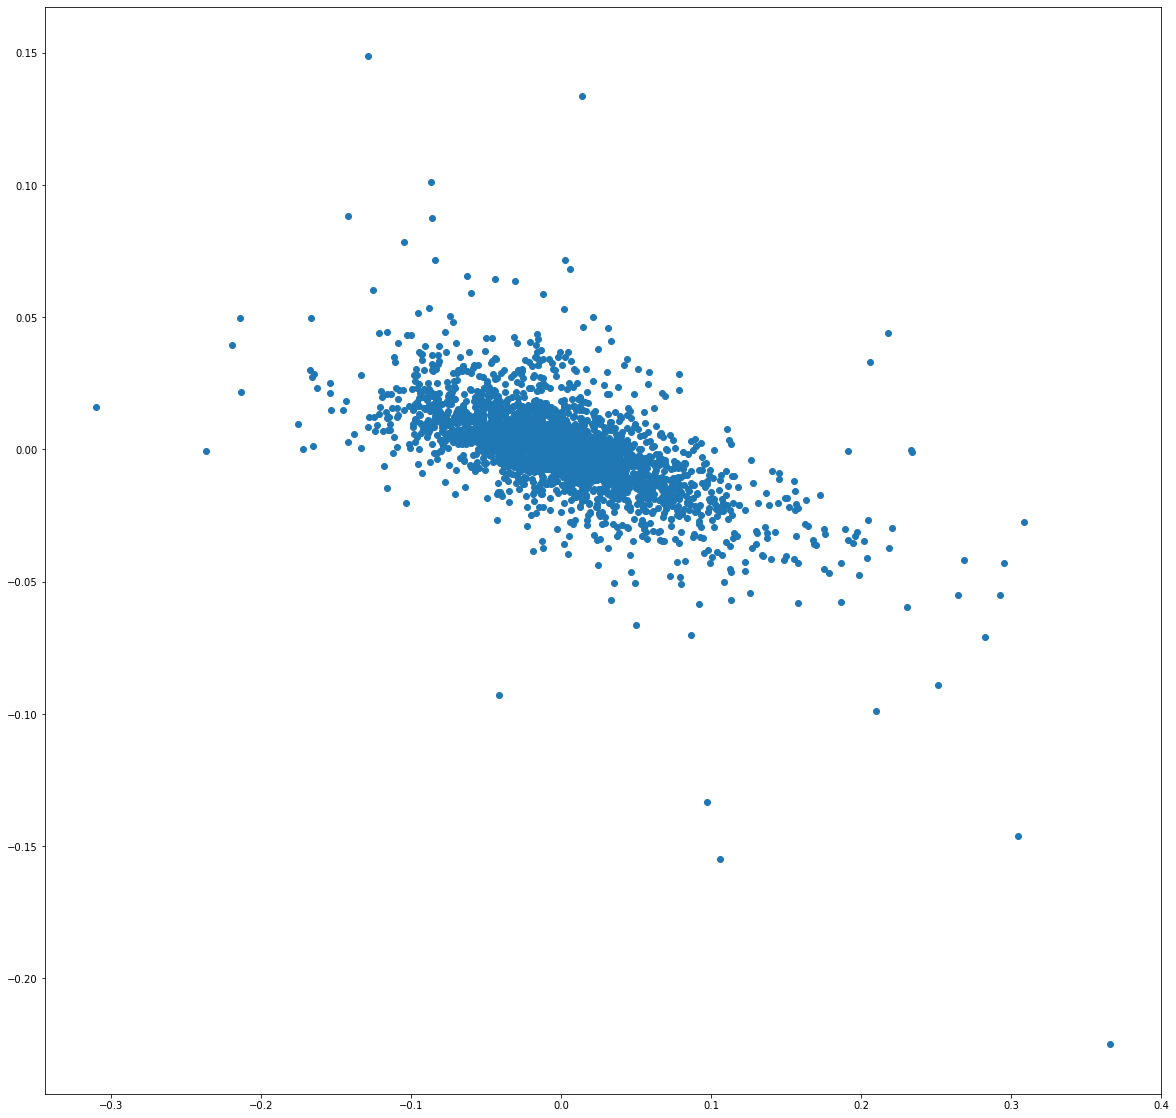

In [9]:
plt.figure(figsize=(20,20))
plt.scatter(diff['close'],diff['XLE, CBOE ONE: Close'])

# VXXLE

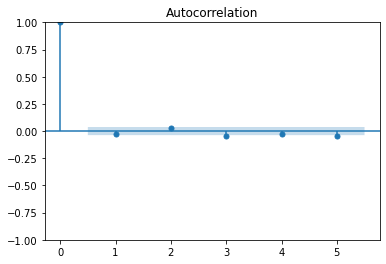

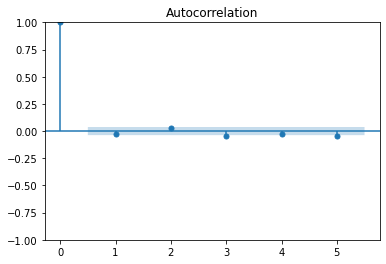

In [13]:
plot_acf(diff['close'].dropna(axis=0), alpha=0.05, lags=5)

c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


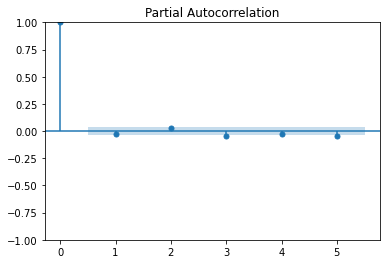

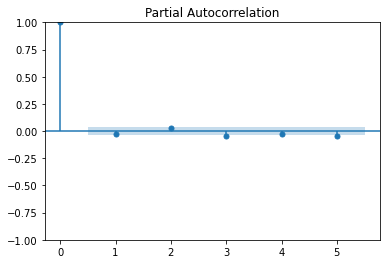

In [14]:
plot_pacf(diff['close'].dropna(axis=0), alpha=0.05, lags=5)

# XLE

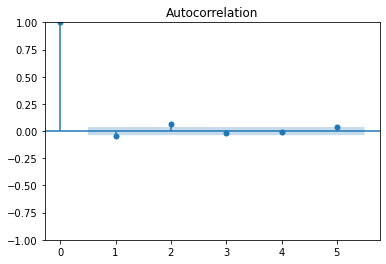

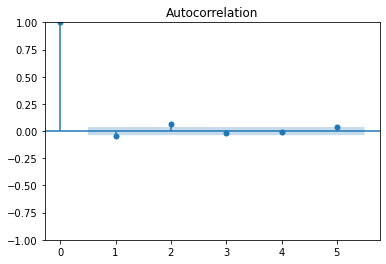

In [15]:
plot_acf(diff['XLE, CBOE ONE: Close'].dropna(axis=0), alpha=0.05, lags=5)

c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


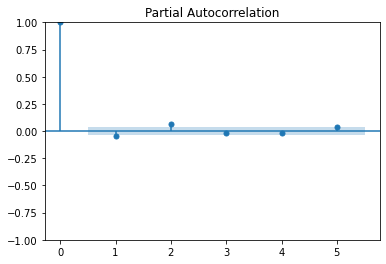

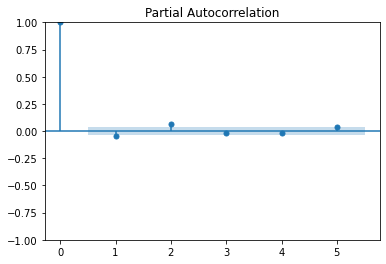

In [16]:
plot_pacf(diff['XLE, CBOE ONE: Close'].dropna(axis=0), alpha=0.05, lags=5)

# Test Model

In [17]:
import statsmodels.api as sm

In [33]:
data = diff.dropna(axis=0).reset_index()

In [34]:
data.head()

,time,close,"XLE, CBOE ONE: Close"
0,2011-03-17 13:30:00+00:00,-0.091090,0.030052
1,2011-03-18 13:30:00+00:00,-0.027626,-0.008059
2,2011-03-21 13:30:00+00:00,-0.085866,0.029923
3,2011-03-22 13:30:00+00:00,-0.019261,-0.002191
4,2011-03-23 13:30:00+00:00,-0.029605,0.002577


In [39]:
# mod = sm.tsa.arima.ARIMA(train_df_diff['close'][0:252],exog=train_df_diff['close_vix'][0:252], order=(1,0,0))
mod = sm.tsa.arima.ARIMA(data['close'],exog=data['XLE, CBOE ONE: Close'], order=(1,0,1))


In [40]:
res = mod.fit()

c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [41]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 2747
Model:                 ARIMA(1, 0, 1)   Log Likelihood                4607.105
Date:                Sat, 15 Jul 2023   AIC                          -9204.209
Time:                        13:18:30   BIC                          -9174.618
Sample:                             0   HQIC                         -9193.518
                               - 2747                                         
Covariance Type:                  opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -6.226e-06      0.001     -0.012      0.990      -0.001       0.001
XLE, CBOE ONE: Close    -1.9929      0.024    -81.417      0.000      -2.041      -1.945
ar.L1                    0.9217      0.022     42.587      0.000       0.879       0.964
ma.L1                   -0.9564      0.017    -55.547      0.000      -0.990      -0.923
sigma2                   0.0020    3.3e-05     62.036      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):              2310.12
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
np.var(res.resid)

5.921321431606846e-05

# No Exog

In [43]:
data.head()
# mod = sm.tsa.arima.ARIMA(train_df_diff['close'][0:252],exog=train_df_diff['close_vix'][0:252], order=(1,0,0))
mod = sm.tsa.arima.ARIMA(data['close'], order=(1,0,1))

res = mod.fit()

In [44]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 2747
Model:                 ARIMA(1, 0, 1)   Log Likelihood                3929.129
Date:                Sat, 15 Jul 2023   AIC                          -7850.259
Time:                        13:26:28   BIC                          -7826.586
Sample:                             0   HQIC                         -7841.705
                               - 2747                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.194e-05      0.001      0.054      0.957      -0.002       0.002
ar.L1         -0.7716      0.119     -6.469      0.000      -1.005      -0.538
ma.L1          0.7395      0.126      5.877      0.000       0.493       0.986
sigma2         0.0034   5.84e-05     57.359      0.000       0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              1556.81
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
import numpy as np
from scipy import stats


# alpha to critical
alpha = 0.05
n_sided = 2 # 2-sided test
z_crit = stats.norm.ppf(1-alpha/n_sided)
print(z_crit) # 1.959963984540054

# critical to alpha
alpha = stats.norm.sf(z_crit) * n_sided
print(alpha) # 0.05

1.959963984540054
0.05
